In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from matplotlib import colors

%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import itertools
import random
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
import matplotlib.patches as patches

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from scipy.fftpack import fft,fftshift,ifft
from scipy import signal

from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_dilation

import seaborn as sns
import pickle

In [2]:
rot_pos_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210930_cc_peaks/rot_pos'
with open(rot_pos_file, 'rb') as handle:
    peaks_pos = pickle.load(handle)
    
rot_neg_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210930_cc_peaks/rot_neg'
with open(rot_neg_file, 'rb') as handle:
    peaks_neg = pickle.load(handle)
    
fwd_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210930_cc_peaks/fwd'
with open(fwd_file, 'rb') as handle:
    peaks_fwd = pickle.load(handle)

In [3]:
##################
### ROI GROUPS ###
##################

full_group = {
26: 'FB',
4: 'NO',
5: 'BU_R',
54: 'BU_L',
8: 'LAL_R',
56: 'LAL_L',
31: 'PVLP_R',
76: 'PVLP_L',
6: 'PB',
23: 'EB',
13: 'VES_R',  
40: 'EPA_R',
35: 'GOR_R',
11: 'AMMC_R',
60: 'VES_L', 
85: 'EPA_L',
80: 'GOR_L',
58: 'AMMC_L',
50: 'PRW',
9: 'SAD',
49: 'GNG',
30: 'AVLP_R',
75: 'AVLP_L',
24: 'AL_R',
70: 'AL_L',
64: 'MB_PED_L',
65: 'MB_VL_L',
66: 'MB_ML_L',
81: 'MB_CA_L',
17: 'MB_PED_R',
18: 'MB_VL_R',
19: 'MB_ML_R',
36: 'MB_CA_R',
32: 'IVLP_R',
77: 'IVLP_L',
10: 'CAN_R',
20: 'FLA_R',
57: 'CAN_L',
67: 'FLA_L',
27: 'SLP_R',
29: 'SMP_R',
33: 'PLP_R',
7: 'LH_R',
38: 'IPS_R',
37: 'SPS_R',
16: 'CRE_R',
39: 'SCL_R',
12: 'ICL_R',
15: 'ATL_R',
14: 'IB_R',
28: 'SIP_R',#####
72: 'SLP_L',   
74: 'SMP_L',
78: 'PLP_L',
55: 'LH_L',
83: 'IPS_L',
82: 'SPS_L',
63: 'CRE_L',
84: 'SCL_L',  
59: 'ICL_L',
62: 'ATL_L',
61: 'IB_L',
73: 'SIP_L',
25: 'MED_R',
3: 'LO_R',
22: 'LP_R',
34: 'AOTU_R',
71: 'MED_L',
53: 'LO_L',
69: 'LP_L',
79: 'AOTU_L',
}

full_right_group = {
6: 'PB',
26: 'FB',
23: 'EB',
4: 'NO',
54: 'BU_L',
56: 'LAL_L',
76: 'PVLP_L',
####################
60: 'VES_L', 
85: 'EPA_L',
80: 'GOR_L',
58: 'AMMC_L',
####################
70: 'AL_L',
64: 'MB_PED_L',
65: 'MB_VL_L',
66: 'MB_ML_L',
81: 'MB_CA_L',
75: 'AVLP_L',
77: 'IVLP_L',
57: 'CAN_L',
67: 'FLA_L',
50: 'PRW',
9: 'SAD',
49: 'GNG', 
####################
72: 'SLP_L',   
74: 'SMP_L',
78: 'PLP_L',
55: 'LH_L',
83: 'IPS_L',
82: 'SPS_L',
63: 'CRE_L',
84: 'SCL_L',  
59: 'ICL_L',
62: 'ATL_L',
61: 'IB_L',
73: 'SIP_L',
###################
71: 'MED_L',
53: 'LO_L',
69: 'LP_L',
79: 'AOTU_L' 
}

full_left_group = {
6: 'PB',
26: 'FB',
23: 'EB',
4: 'NO',
5: 'BU_R',
8: 'LAL_R',
31: 'PVLP_R',
##################
13: 'VES_R',  
40: 'EPA_R',
35: 'GOR_R',
11: 'AMMC_R',
##################
24: 'AL_R',
17: 'MB_PED_R',
18: 'MB_VL_R',
19: 'MB_ML_R',
36: 'MB_CA_R',
30: 'AVLP_R',
32: 'IVLP_R',
10: 'CAN_R',
20: 'FLA_R',
50: 'PRW',
9: 'SAD',
49: 'GNG',
###################    
27: 'SLP_R',
29: 'SMP_R',
33: 'PLP_R',
7: 'LH_R',
38: 'IPS_R',
37: 'SPS_R',
16: 'CRE_R',
39: 'SCL_R',
12: 'ICL_R',
15: 'ATL_R',
14: 'IB_R',
28: 'SIP_R',
###################
25: 'MED_R',
3: 'LO_R',
22: 'LP_R',
34: 'AOTU_R'
}

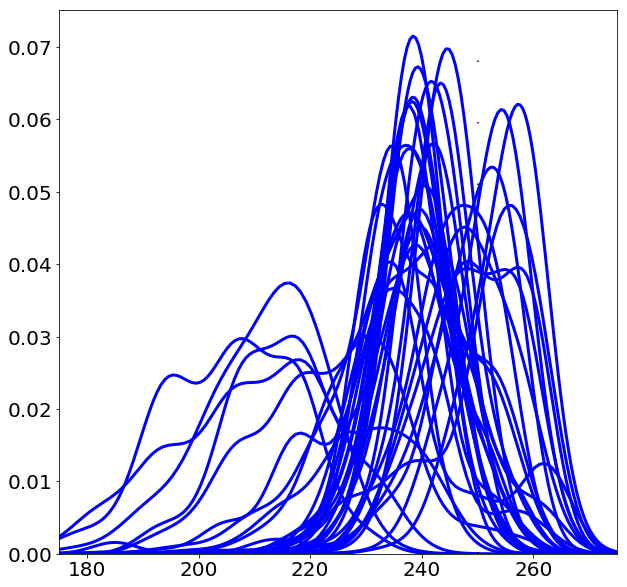

In [64]:
#want first bin to be -300, last 1000
#
plt.figure(figsize=(10,10))
for k in full_left_group.keys():
    if k not in [5,10,20,50]:
        sns.distplot(peaks_fwd[k], hist = False, kde = True, color='b',
                     kde_kws = {'shade': False, 'linewidth': 3, 'bw':4})
#         sns.distplot(peaks_pos[k], hist = False, kde = True, color='r',
#              kde_kws = {'shade': False, 'linewidth': 3, 'bw':4})
#         sns.distplot(peaks_neg[k], hist = False, kde = True, color=(0,1,0),
#              kde_kws = {'shade': False, 'linewidth': 3, 'bw':4})
# for k in full_right_group.keys():
#     sns.distplot(peaks[k], hist = False, kde = True, color='r',
#                  kde_kws = {'shade': False, 'linewidth': 1, 'bw':2})
plt.axvline(250,color='k',linestyle=(0, (1, 40)))
plt.xlim(175,275)
#plt.xlim(200,265)
#50 steps is a sec
#so, 10steps is 200ms
#plt.axis('off')
# -500ms to 1500

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

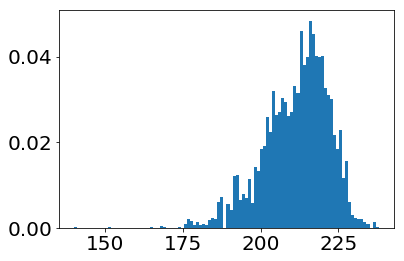

In [21]:
plt.hist(peaks_fwd[25],normed=True,bins=100);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


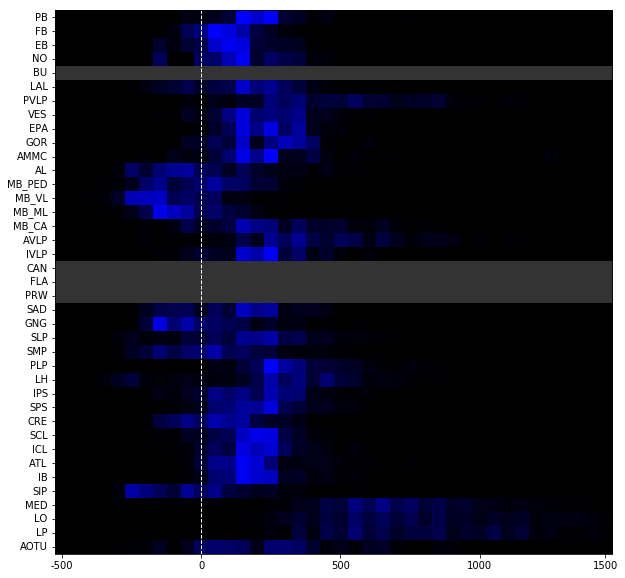

In [11]:
### Normalized histograms of peak times per ROI ###

# lets do this manually, then can make a heat plot of 1D hists

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_fwd[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked_left = np.zeros((0,40))
for k, roi in enumerate(full_left_group.keys()):
    hist, bin_edges = np.histogram(peaks_fwd[roi], bins=40, range=(175,275), density=True)
    hist_stacked_left = np.concatenate((hist_stacked_left,hist[np.newaxis,:]))
    
hist_stacked = (hist_stacked_right+hist_stacked_left)/2
    
hist_stacked = np.stack((np.zeros(hist_stacked.shape),np.zeros(hist_stacked.shape),hist_stacked))
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked = hist_stacked*10

hist_stacked[[4,18,19,20],:,:] = .2 # grey out tiny noisy neuropiles

hist_stacked = hist_stacked[:,::-1]
#hist_stacked = hist_stacked[:,5:,:] #trim off first 250ms
#hist_stacked = hist_stacked[:,:-10,:] #trim off last 500ms

plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked),vmin=0,vmax=.1,cmap='Blues')
plt.axvline(10,color='w',lw=1,linestyle='--')
# ax.set_yticks(list(range(39)))
# ax.set_yticklabels(full_right_group.values(), fontsize=12);


##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i for i in np.arange(len(names))]);
ax.set_yticklabels(names);
ax.set_xticks([0,10,20,30,39]);
ax.set_xticklabels([-500,0,500,1000,1500]);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");
plt.setp(ax.get_xticklabels(), x=0, rotation=0, ha="center", va='top', fontsize=10, rotation_mode="anchor");

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

In [22]:
import matplotlib

In [66]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",(0,0,1)])

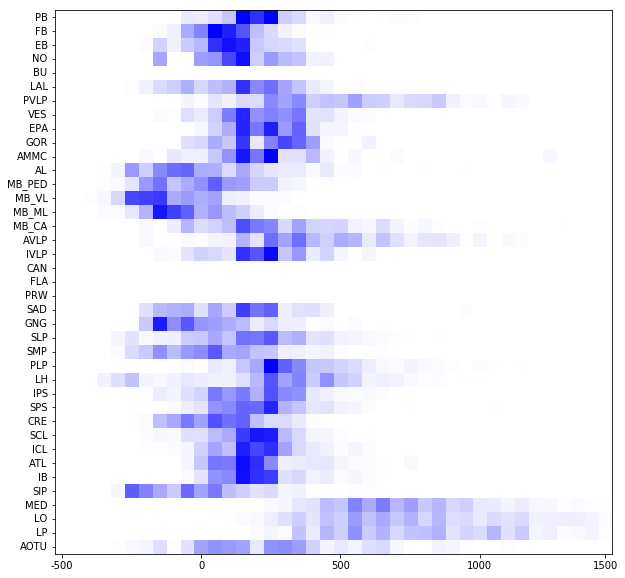

In [71]:
### Normalized histograms of peak times per ROI ###

# lets do this manually, then can make a heat plot of 1D hists

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_fwd[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked_left = np.zeros((0,40))
for k, roi in enumerate(full_left_group.keys()):
    hist, bin_edges = np.histogram(peaks_fwd[roi], bins=40, range=(175,275), density=True)
    hist_stacked_left = np.concatenate((hist_stacked_left,hist[np.newaxis,:]))
    
hist_stacked = (hist_stacked_right+hist_stacked_left)/2
    
# hist_stacked = np.stack((np.zeros(hist_stacked.shape),np.zeros(hist_stacked.shape),hist_stacked))
# hist_stacked = np.moveaxis(hist_stacked,0,2)
#hist_stacked = hist_stacked*10

hist_stacked[[4,18,19,20],:] = 0 # grey out tiny noisy neuropiles

hist_stacked = hist_stacked[:,::-1]
#hist_stacked = hist_stacked[:,5:,:] #trim off first 250ms
#hist_stacked = hist_stacked[:,:-10,:] #trim off last 500ms

plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked),vmin=0,vmax=.1,cmap=cmap)
#plt.axvline(10,color='w',lw=1,linestyle='--')
# ax.set_yticks(list(range(39)))
# ax.set_yticklabels(full_right_group.values(), fontsize=12);


##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i for i in np.arange(len(names))]);
ax.set_yticklabels(names);
ax.set_xticks([0,10,20,30,39]);
ax.set_xticklabels([-500,0,500,1000,1500]);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");
plt.setp(ax.get_xticklabels(), x=0, rotation=0, ha="center", va='top', fontsize=10, rotation_mode="anchor");

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


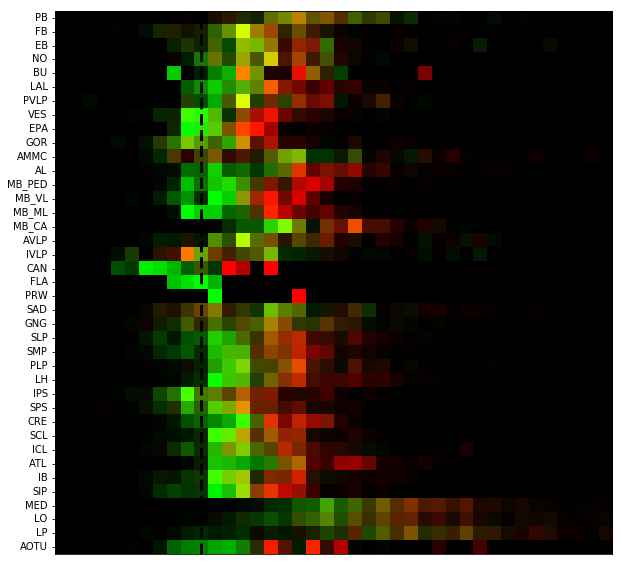

In [13]:
# To plot green/red L/R on top of each other, will probably need to make the RGB channels. easy.
### Normalized histograms of peak times per ROI ###

# lets do this manually, then can make a heat plot of 1D hists

hist_stacked_right_pos = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_pos[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right_pos = np.concatenate((hist_stacked_right_pos,hist[np.newaxis,:]))
    
hist_stacked_right_neg = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_neg[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right_neg = np.concatenate((hist_stacked_right_neg,hist[np.newaxis,:]))

hist_stacked = np.stack((hist_stacked_right_pos, hist_stacked_right_neg, np.zeros(hist_stacked_right_pos.shape))) 
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked = hist_stacked*10

# hist_stacked_left = np.zeros((0,40))
# for k, roi in enumerate(full_left_group.keys()):
#     hist, bin_edges = np.histogram(peaks[roi], bins=40, range=(175,275), density=True)
#     hist_stacked_left = np.concatenate((hist_stacked_left,hist[np.newaxis,:]))
    
#hist_stacked = (hist_stacked_right+hist_stacked_left)/2
#hist_stacked = hist_stacked_left
    
plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked[:,::-1,:]),vmin=0,vmax=.1) #Blues
plt.axvline(10,color='k',lw=3,linestyle='--')
# ax.set_yticks(list(range(39)))
# ax.set_yticklabels(full_right_group.values(), fontsize=12);


##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i for i in np.arange(len(names))]);
ax.set_xticks([]);
ax.set_yticklabels(names);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


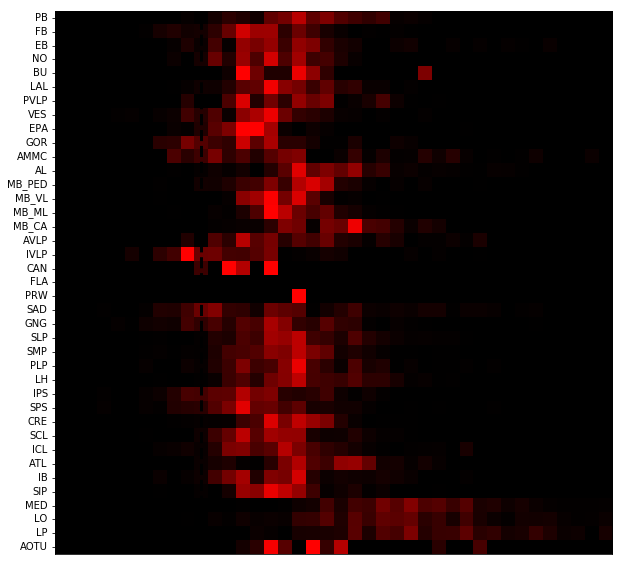

In [11]:
### Normalized histograms of peak times per ROI ###

# lets do this manually, then can make a heat plot of 1D hists

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_pos[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked = np.stack((hist_stacked_right, np.zeros(hist_stacked_right.shape), np.zeros(hist_stacked_right.shape))) 
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked = hist_stacked*10
    
plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked[:,::-1]),vmin=0,vmax=.05)
plt.axvline(10,color='k',lw=3,linestyle='--')
# ax.set_yticks(list(range(39)))
# ax.set_yticklabels(full_right_group.values(), fontsize=12);


##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i for i in np.arange(len(names))]);
ax.set_xticks([]);
ax.set_yticklabels(names);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


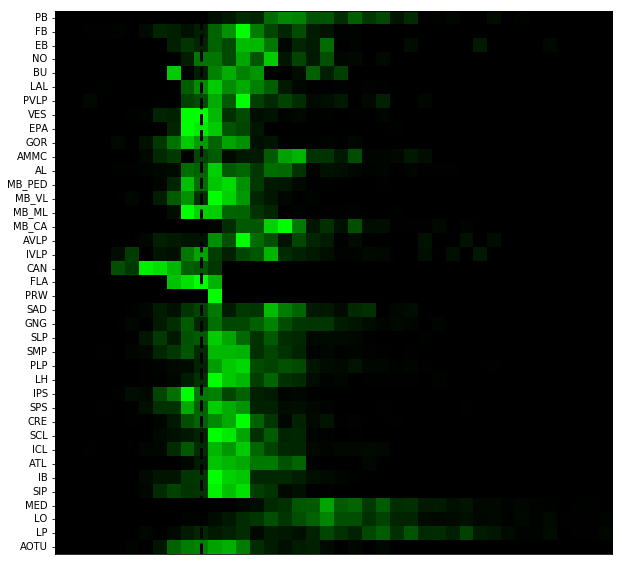

In [12]:
### Normalized histograms of peak times per ROI ###

# lets do this manually, then can make a heat plot of 1D hists

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_neg[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked = np.stack((np.zeros(hist_stacked_right.shape), hist_stacked_right, np.zeros(hist_stacked_right.shape))) 
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked = hist_stacked*10
    
plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked[:,::-1]),vmin=0,vmax=.05)
plt.axvline(10,color='k',lw=3,linestyle='--')
# ax.set_yticks(list(range(39)))
# ax.set_yticklabels(full_right_group.values(), fontsize=12);


##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i for i in np.arange(len(names))]);
ax.set_xticks([]);
ax.set_yticklabels(names);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [72]:
# there are 500 timepoints over 10sec, so 20ms each
# in these graphs we have 40 bins over 100 timepoints (2sec), or 50ms each
# current plots start at 25 timepoints before middle, or 500ms before
25*20

500

In [74]:
2/40

0.05

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


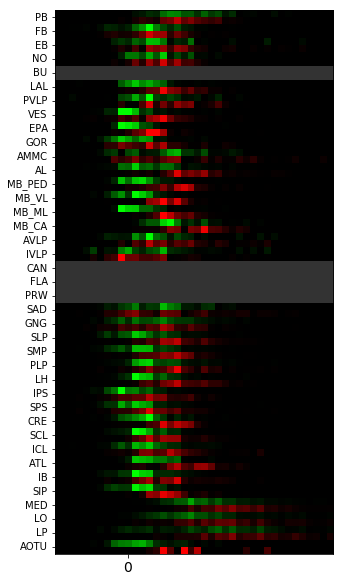

In [50]:
### Normalized histograms of peak times per ROI ###

# lets do this manually, then can make a heat plot of 1D hists
######### green

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_neg[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked = np.stack((np.zeros(hist_stacked_right.shape), hist_stacked_right, np.zeros(hist_stacked_right.shape))) 
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked_g = hist_stacked*10
hist_stacked_g[[4,18,19,20],:,:] = .2 # black out tiny noisy neuropiles

######## red

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_right_group.keys()):
    hist, bin_edges = np.histogram(peaks_pos[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked = np.stack((hist_stacked_right, np.zeros(hist_stacked_right.shape), np.zeros(hist_stacked_right.shape))) 
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked_r = hist_stacked*10
hist_stacked_r[[4,18,19,20],:,:] = .2 # grey out tiny noisy neuropiles


######### interleave

hist_stacked = np.empty((78,40,3), dtype=hist_stacked_g.dtype)
hist_stacked[0::2,:,:] = hist_stacked_g
hist_stacked[1::2,:,:] = hist_stacked_r

########
hist_stacked = hist_stacked[:,::-1]
# hist_stacked = hist_stacked[:,5:,:] #trim off first 250ms
# hist_stacked = hist_stacked[:,:-10,:] #trim off last 500ms

plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked),vmin=0,vmax=.05)
#plt.axvline(5,color='w',lw=1,linestyle='--')
# ax.set_yticks(list(range(39)))
# ax.set_yticklabels(full_right_group.values(), fontsize=12);


##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i+.5 for i in np.arange(0,78,2)]);
ax.set_yticklabels(names);
ax.set_xticks([10]);
ax.set_xticklabels([0]);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");
plt.setp(ax.get_xticklabels(), x=0, rotation=0, ha="center", va='top', fontsize=14, rotation_mode="anchor");

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


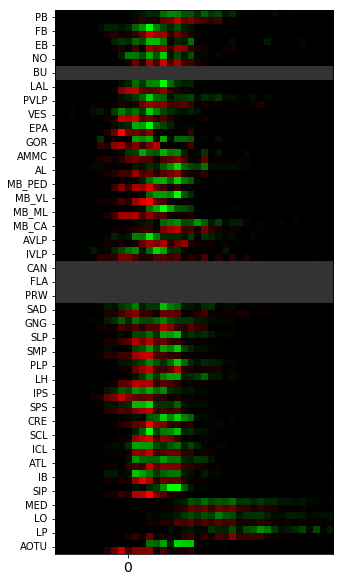

In [54]:
### Normalized histograms of peak times per ROI ###

# lets do this manually, then can make a heat plot of 1D hists
######### green

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_left_group.keys()):
    hist, bin_edges = np.histogram(peaks_neg[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked = np.stack((np.zeros(hist_stacked_right.shape), hist_stacked_right, np.zeros(hist_stacked_right.shape))) 
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked_g = hist_stacked*10
hist_stacked_g[[4,18,19,20],:,:] = .2 # grey out tiny noisy neuropiles


######## red

hist_stacked_right = np.zeros((0,40))
for k, roi in enumerate(full_left_group.keys()):
    hist, bin_edges = np.histogram(peaks_pos[roi], bins=40, range=(175,275), density=True)
    hist_stacked_right = np.concatenate((hist_stacked_right,hist[np.newaxis,:]))
    
hist_stacked = np.stack((hist_stacked_right, np.zeros(hist_stacked_right.shape), np.zeros(hist_stacked_right.shape))) 
hist_stacked = np.moveaxis(hist_stacked,0,2)
hist_stacked_r = hist_stacked*10
hist_stacked_r[[4,18,19,20],:,:] = .2 # grey out tiny noisy neuropiles


######### interleave

hist_stacked = np.empty((78,40,3), dtype=hist_stacked_g.dtype)
hist_stacked[0::2,:,:] = hist_stacked_g
hist_stacked[1::2,:,:] = hist_stacked_r

########
hist_stacked = hist_stacked[:,::-1]
# hist_stacked = hist_stacked[:,5:,:] #trim off first 250ms
# hist_stacked = hist_stacked[:,:-10,:] #trim off last 500ms
########

plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked),vmin=0,vmax=.05)
#plt.axvline(5,color='w',lw=1,linestyle='--')
# ax.set_yticks(list(range(39)))
# ax.set_yticklabels(full_right_group.values(), fontsize=12);


##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i+.5 for i in np.arange(0,78,2)]);
ax.set_yticklabels(names);
ax.set_xticks([10]);
ax.set_xticklabels([0]);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");
plt.setp(ax.get_xticklabels(), x=0, rotation=0, ha="center", va='top', fontsize=14, rotation_mode="anchor");

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

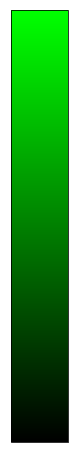

In [61]:
# colors1 = plt.cm.coolwarm_r(np.linspace(0, .5, middle-start))
# colors2 = plt.cm.coolwarm_r(np.linspace(.5, 1, end-middle))
# spectral_map = mcolors.LinearSegmentedColormap.from_list('my_colormap', np.vstack((colors1, colors2)))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["k",(0,1,0)])

a = np.array([[0,1]])
plt.figure(figsize=(1, 10))
img = plt.imshow(a, cmap=cmap)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(cax=cax,ticks=[])

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')